### Homework 2.2 - Heat Transfer

Use the finite differential method to solve a heat transfer equation, given by

$$ \frac{{\partial T}}{{\partial t}} = k\frac{{{\partial ^2}T}}{{\partial {x^2}}} $$

where $T(t, x)$ is the temperature distribution function.

Solve the equation for $x$ between 0 and 1. At $x=0$ the temperature varies as $T(t,0)=sin(10t)$ and at At $x=1$ the temperature varies as $T(t,0)=e^{ - 100 (t - 0.15)^2}$.

Make the animated clip of the temperature distribution function evolution. Pick appropriate time range.

$$\frac{{{T_{i,j + 1}} - {T_{i,j}}}}{\eta } = k\frac{{{T_{i + 1,j}} - 2{T_{i,j}} + {T_{i - 1,j}}}}{{{\delta ^2}}}$$

Let $\varepsilon  = \frac{{k\eta }}{{{\delta ^2}}}$

$${T_{i,j + 1}} - {T_{i,j}} = \varepsilon \left( {{T_{i + 1,j}} - 2{T_{i,j}} + {T_{i - 1,j}}} \right)$$

$${T_{i,j + 1}} = \varepsilon \left( {{T_{i + 1,j}} - 2{T_{i,j}} + {T_{i - 1,j}}} \right) + {T_{i,j}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#%matplotlib inline

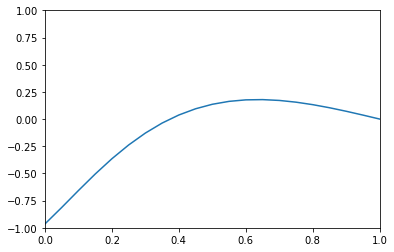

In [2]:
# Set up an array of ux0
N = 20
L = 1
x = np.linspace(0, L, num=N + 1, endpoint=True)
Tx0 = 0*x

Told = Tx0

dt = 0.001 # Set up time step size
dh = L / N # Spatial step size
k = 0.4
eps = k*dt/(dh**2)

# Calculate time step j = 1
Txj = np.zeros(N+1)

TAll = np.array([Txj])
fig1 = plt.figure()
l = plt.plot(x, Txj)
axes = plt.gca()
axes.set_ylim([-1,1])
axes.set_xlim([0,1])

for j in range(500):
    Tnew = np.zeros(N+1)
    Tnew[0] = np.sin(10*j*dt)
    Tnew[-1] = np.exp(-100*(j*dt-0.15)**2)
    for i in np.linspace(1, N-1, N-1, dtype=int):
        Tnew[i] = eps*(Txj[i+1] - 2*Txj[i] + Txj[i-1]) + Txj[i]
    Told = Txj 
    Txj = Tnew
    TAll = np.vstack([TAll, Tnew])
    #if j > 30:
    #    plt.plot(x, Unew)

def update_line(num, line):
    line.set_data(x, TAll[num])
    return line,

line_ani = animation.FuncAnimation(fig1, update_line, 500, fargs=(l), interval=20, blit=True)
# line_ani.save('wave-in-string.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
writergif = animation.PillowWriter(fps=30)
line_ani.save('heat-transfer.gif',writer=writergif)
plt.show()